<a href="https://colab.research.google.com/github/Kajalm1995/Deep-Learning/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression with Keras

In [ ]:
from warnings import filterwarnings
filterwarnings('ignore')

### Generate a regression data with scikit-learn

In [ ]:
from sklearn.datasets import make_regression
X, Y = make_regression(n_samples=6000,
                       n_features=30,
                       n_informative=28,
                       noise=10,
                       random_state=42)

In [ ]:
X

array([[ 0.05348441,  1.20438158,  0.26484584, ..., -0.94817572,
         0.78809604, -0.98293539],
       [ 0.63714749,  1.68950967, -0.94619672, ...,  0.4568421 ,
        -0.60176399,  0.87070116],
       [-0.2960535 ,  0.38640459, -0.08753246, ...,  0.45667765,
        -0.44347628, -0.23727441],
       ...,
       [-0.89326012,  1.00502212, -0.38325364, ..., -0.46287398,
        -0.44287175, -1.34934305],
       [ 1.52792011, -1.59535041,  0.02360452, ..., -1.01508364,
         0.85060175,  0.29296675],
       [-0.24786177,  0.71312643, -0.25079625, ...,  0.10606949,
        -1.55008952,  0.82605466]])

In [ ]:
Y

array([-111.29089834, -397.19811487,  593.32233468, ..., -424.03501753,
        -40.05251539,  102.61804396])

In [ ]:
X.shape

(6000, 30)

In [ ]:
X.shape[1]

30

### Save above X and Y in dataframe

In [ ]:
cols = [f'x{i+1}' for i in range(X.shape[1])]
cols

['x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x8',
 'x9',
 'x10',
 'x11',
 'x12',
 'x13',
 'x14',
 'x15',
 'x16',
 'x17',
 'x18',
 'x19',
 'x20',
 'x21',
 'x22',
 'x23',
 'x24',
 'x25',
 'x26',
 'x27',
 'x28',
 'x29',
 'x30']

In [ ]:
import pandas as pd
X = pd.DataFrame(X, columns=cols)

In [ ]:
X.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30
0,0.053484,1.204382,0.264846,-0.489184,1.235794,0.901947,-1.441888,1.266185,1.230761,1.107351,...,1.819524,-1.150787,0.345756,-1.772915,1.862847,0.431246,1.627266,-0.948176,0.788096,-0.982935
1,0.637147,1.689510,-0.946197,0.319665,-1.441362,-0.669945,-1.445657,1.185584,-0.639403,-0.487488,...,0.204365,0.571954,0.063658,1.669382,1.478518,-0.499410,2.047601,0.456842,-0.601764,0.870701
2,-0.296053,0.386405,-0.087532,1.263187,2.524384,0.531609,-1.101151,0.233384,1.248554,2.216547,...,-1.371824,-0.510712,-0.719610,1.065965,0.059832,1.382271,0.320028,0.456678,-0.443476,-0.237274
3,0.766204,0.537727,-0.420216,0.519186,-0.367321,2.533612,-1.591935,-0.587771,-0.714990,1.144626,...,0.456323,-0.881183,0.059926,-0.867486,-1.796930,0.255309,1.163367,-1.134661,0.893865,0.770209
4,0.028961,1.123280,0.814825,-1.124811,0.237052,-0.161856,1.580188,0.528454,0.999679,0.313964,...,0.778473,-1.788614,-0.206375,-1.518238,0.194326,-0.448185,0.261557,-1.283204,-0.133794,1.243476


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      6000 non-null   float64
 1   x2      6000 non-null   float64
 2   x3      6000 non-null   float64
 3   x4      6000 non-null   float64
 4   x5      6000 non-null   float64
 5   x6      6000 non-null   float64
 6   x7      6000 non-null   float64
 7   x8      6000 non-null   float64
 8   x9      6000 non-null   float64
 9   x10     6000 non-null   float64
 10  x11     6000 non-null   float64
 11  x12     6000 non-null   float64
 12  x13     6000 non-null   float64
 13  x14     6000 non-null   float64
 14  x15     6000 non-null   float64
 15  x16     6000 non-null   float64
 16  x17     6000 non-null   float64
 17  x18     6000 non-null   float64
 18  x19     6000 non-null   float64
 19  x20     6000 non-null   float64
 20  x21     6000 non-null   float64
 21  x22     6000 non-null   float64
 22  

In [ ]:
Y = pd.DataFrame(Y, columns=['target'])
Y.head()

,target
0,-111.290898
1,-397.198115
2,593.322335
3,134.417991
4,-142.305920


In [ ]:
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  6000 non-null   float64
dtypes: float64(1)
memory usage: 47.0 KB


### Preprocessing X terms

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [ ]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='mean')),
                           ('scaler', StandardScaler())]).set_output(transform='pandas')

In [ ]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30
0,0.053399,1.181849,0.261048,-0.492114,1.251535,0.911157,-1.440724,1.259802,1.219348,1.100366,...,1.838525,-1.139640,0.346270,-1.789456,1.858824,0.447189,1.628343,-0.935980,0.817887,-1.002630
1,0.636349,1.662965,-0.965637,0.318705,-1.395992,-0.675791,-1.444544,1.179151,-0.647402,-0.494154,...,0.212208,0.591546,0.062734,1.697351,1.473302,-0.471216,2.053326,0.428466,-0.591405,0.825524
2,-0.295711,0.370635,-0.095882,1.264524,2.525865,0.537272,-1.095296,0.226345,1.237109,2.209341,...,-1.374871,-0.496427,-0.724528,1.086132,0.050207,1.385692,0.306649,0.428306,-0.430904,-0.267220
3,0.765247,0.520707,-0.432863,0.518711,-0.333837,2.558453,-1.592836,-0.595332,-0.722851,1.137634,...,0.465906,-0.868714,0.058983,-0.872320,-1.812327,0.273567,1.159314,-1.117080,0.925135,0.726413
4,0.028906,1.101418,0.818131,-1.129288,0.263847,-0.162836,1.622952,0.521602,0.988688,0.307138,...,0.790282,-1.780593,-0.208676,-1.531486,0.185118,-0.420665,0.247531,-1.261334,-0.116892,1.193173


### Train test split
20% of data will add to test

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=42)

In [ ]:
xtrain.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30
3897,-0.929114,-1.003812,-0.775442,0.046073,-1.487171,-1.208194,1.582170,0.020334,-0.490298,0.143964,...,-0.048979,-0.191123,1.045913,0.041091,0.844600,-0.017190,1.927313,-0.729996,-0.434912,0.808948
5628,-0.734250,-0.527037,-0.910915,0.197119,-0.176541,-0.254434,1.075740,-0.708080,-0.619939,0.953897,...,-1.074141,-2.226934,0.660840,-1.494144,2.334410,0.201841,1.025693,1.062525,-1.270740,0.132731
1756,0.952576,-0.035052,1.394425,-1.103645,1.255558,-0.800033,0.110754,0.441722,0.801334,1.249008,...,-1.035201,-1.777916,-0.028355,-0.096813,-1.206350,0.236539,0.444533,-0.329921,-0.568126,0.729659
2346,0.241657,-1.429358,1.246479,-0.432959,1.391068,0.413321,1.117135,-0.699507,-1.970430,1.607827,...,1.032446,-1.197872,0.040109,0.186583,1.015998,-0.563269,0.272868,0.509022,0.035211,-0.320905
2996,0.766689,-0.794297,0.343329,1.953467,-0.806140,1.349566,-0.235944,-0.964743,1.758490,-0.311165,...,1.041501,-1.182530,0.511341,1.410413,-1.331172,0.392545,0.127252,1.056255,1.250498,0.629383


In [ ]:
ytrain.head()

,target
3897,-589.224523
5628,60.928468
1756,153.673625
2346,226.343346
2996,305.922498


In [ ]:
xtest.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30
1782,-2.422098,-0.609951,2.484146,0.075927,0.268518,0.488553,-0.705465,1.770613,-0.569316,0.084979,...,0.562180,-0.669868,0.971652,-0.051760,-0.898334,-0.285714,0.549408,1.376994,-0.001972,-0.158512
3917,-0.640008,-1.440983,-2.620591,0.342000,0.760226,0.652124,-0.624160,1.957643,-0.954772,-0.173157,...,-1.263978,0.075128,1.265207,-1.005948,1.231983,-0.097012,-1.713705,-1.703387,-0.472642,0.192619
221,-0.992667,1.214846,-0.542340,-1.799210,1.188168,-1.186869,0.508541,0.413271,1.170568,-0.976694,...,-0.393996,0.114938,0.182183,-0.307937,-0.980866,1.044067,-0.882888,-0.403535,0.403850,-0.410762
2135,0.244756,1.029631,2.095178,1.607730,-0.385238,0.780932,-0.674922,-0.304824,-2.330160,-0.517627,...,1.058072,-0.492892,0.998525,0.443425,0.162991,-0.547579,0.414602,-2.012507,-0.422071,-0.253905
5224,1.115296,-1.403348,1.319139,0.537049,0.053579,0.324643,-1.957454,0.225055,1.548241,-1.260674,...,-0.052403,-0.327037,1.168748,-0.052317,-0.032318,-0.251624,0.487482,-1.050433,2.139103,-0.603715


In [ ]:
ytest.head()

,target
1782,572.213283
3917,-591.254502
221,-354.634777
2135,-158.831569
5224,367.806910


In [ ]:
xtrain.shape

(4800, 30)

In [ ]:
xtest.shape

(1200, 30)

In [ ]:
xtrain.shape[1]

30

### Start building the neural network with Keras

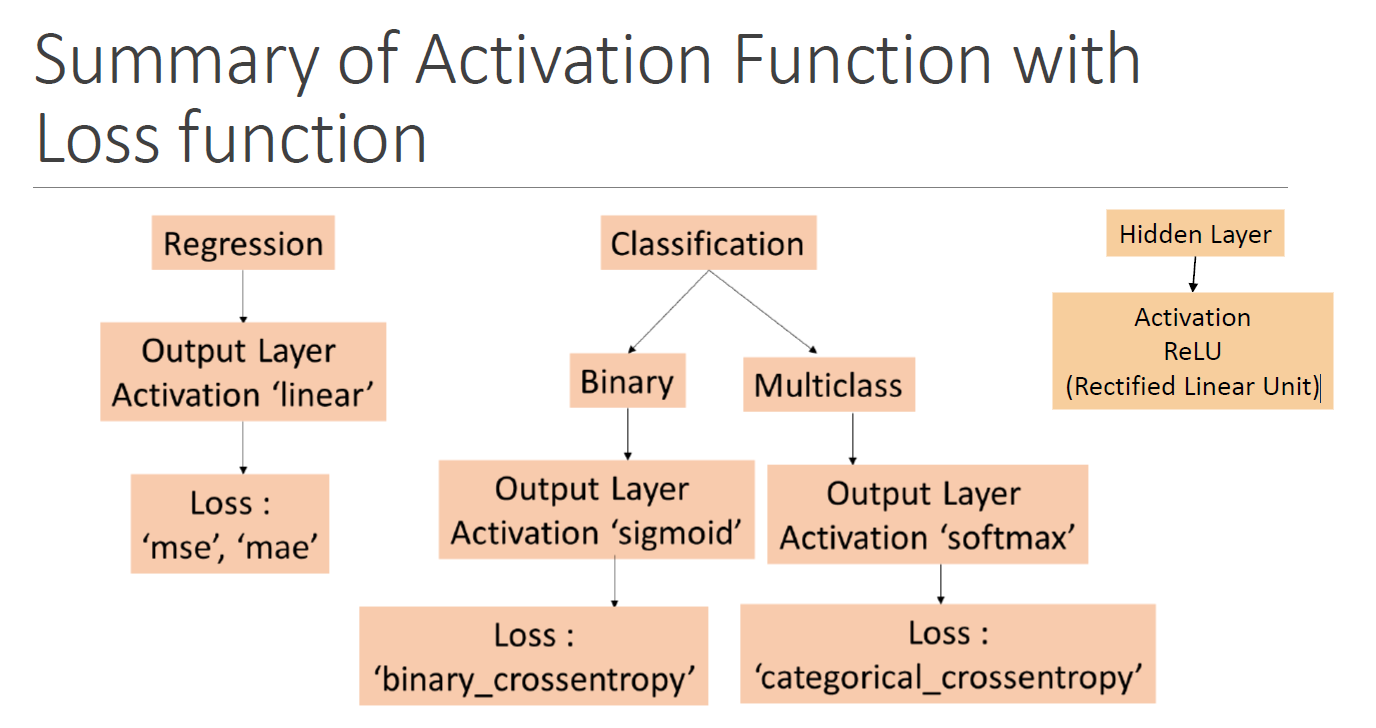

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Input

In [ ]:
# Initialize the neural network
model = Sequential()

# Add input layer
model.add(Input(shape=(xtrain.shape[1],)))

# Add a dense layer with 64 neurons
model.add(Dense(units=64, activation='relu'))

# Add a dense layer with 32 neurons
model.add(Dense(units=32, activation='relu'))

# Add output layer with linear activation function
model.add(Dense(1, activation='linear'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1984      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4097 (16.00 KB)
Trainable params: 4097 (16.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Compile the model

In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

### Fitting the model

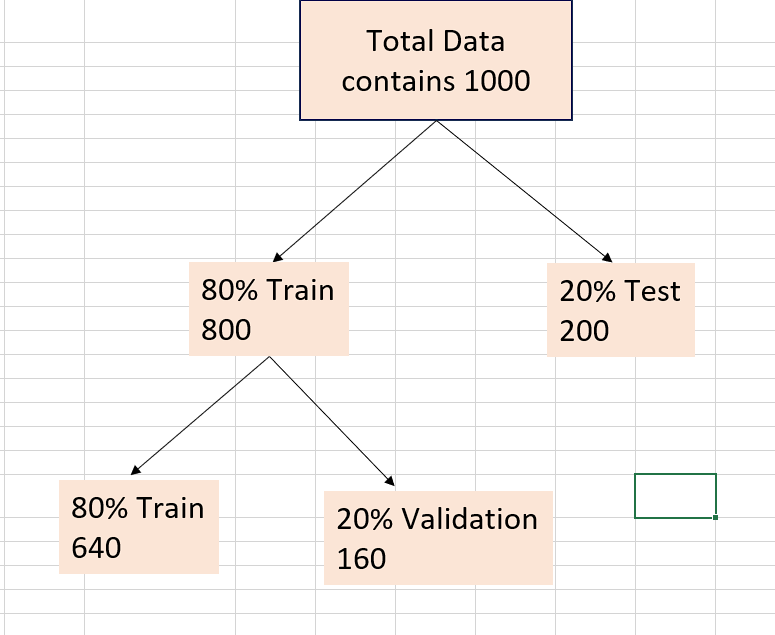

In [ ]:
hist = model.fit(xtrain, ytrain, validation_split=0.2, epochs=100)

Epoch 1/100
120/120 [==============================] - 3s 4ms/step - loss: 116564.6328 - mae: 271.0131 - val_loss: 116983.2656 - val_mae: 274.2427
Epoch 2/100
120/120 [==============================] - 0s 3ms/step - loss: 90769.5859 - mae: 236.2193 - val_loss: 62330.9336 - val_mae: 195.4543
Epoch 3/100
120/120 [==============================] - 0s 3ms/step - loss: 26038.6934 - mae: 113.6673 - val_loss: 5583.8081 - val_mae: 51.0992
Epoch 4/100
120/120 [==============================] - 0s 3ms/step - loss: 2224.3618 - mae: 34.2769 - val_loss: 1159.6057 - val_mae: 25.8350
Epoch 5/100
120/120 [==============================] - 0s 3ms/step - loss: 922.4861 - mae: 23.9005 - val_loss: 734.4324 - val_mae: 21.3307
Epoch 6/100
120/120 [==============================] - 0s 3ms/step - loss: 700.9916 - mae: 21.0837 - val_loss: 635.2540 - val_mae: 20.1058
Epoch 7/100
120/120 [==============================] - 0s 3ms/step - loss: 626.7120 - mae: 20.0804 - val_loss: 579.5076 - val_mae: 19.0712
Epoch 8

### Plot the learning curve

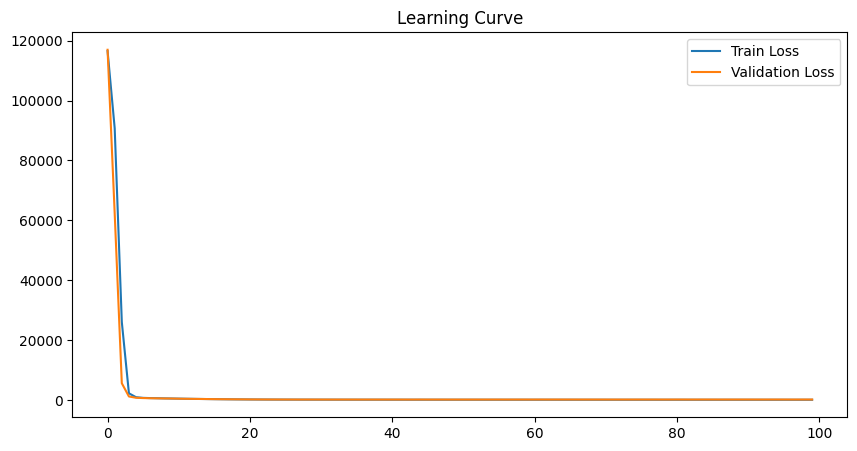

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title('Learning Curve')
plt.legend()
plt.show()

### Evaluate the model in train and test

In [ ]:
model.evaluate(xtrain, ytrain)

150/150 [==============================] - 0s 2ms/step - loss: 77.4112 - mae: 6.7713


[77.41116333007812, 6.7713470458984375]

In [ ]:
model.evaluate(xtest, ytest)

38/38 [==============================] - 0s 2ms/step - loss: 141.0201 - mae: 9.4030


[141.02011108398438, 9.402961730957031]

### Predict the results for train and test

In [ ]:
ypred_tr = model.predict(xtrain)
ypred_ts = model.predict(xtest)

38/38 [==============================] - 0s 3ms/step


In [ ]:
ypred_tr[0:5]

array([[-603.5057  ],
       [  58.284325],
       [ 160.07385 ],
       [ 233.73341 ],
       [ 309.84265 ]], dtype=float32)

In [ ]:
ytrain.head()

,target
3897,-589.224523
5628,60.928468
1756,153.673625
2346,226.343346
2996,305.922498


In [ ]:
ypred_ts[0:5]

array([[ 580.4057 ],
       [-600.40424],
       [-353.53662],
       [-155.11942],
       [ 365.92645]], dtype=float32)

In [ ]:
ytest.head()

,target
1782,572.213283
3917,-591.254502
221,-354.634777
2135,-158.831569
5224,367.806910


### Get R2 score in train and test

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_tr = r2_score(ytrain, ypred_tr)
r2_tr

0.9993521499760399

In [ ]:
r2_ts = r2_score(ytest, ypred_ts)
r2_ts

0.9988013440965763

### Save the Keras model

In [ ]:
model.save('RegressionModel.keras')

### Loading the model

In [ ]:
from keras.models import load_model

In [ ]:
nn = load_model('/content/RegressionModel.keras')

In [ ]:
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1984      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4097 (16.00 KB)
Trainable params: 4097 (16.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
